Here's an outline of the steps we'll follow:

- Import the necessary libraries and load the IMDB dataset.
- Preprocess the data by encoding the text and splitting it into training and testing sets.
- Build and train the deep neural network model.
- Evaluate the model's performance on the test set.
- Make predictions on new movie reviews.

In [23]:
# Step 1: Import libraries and load the dataset
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

# Set the maximum number of words to consider in the vocabulary
max_words = 5000

# Load the IMDB dataset

data = imdb.load_data(num_words=max_words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Concatenate the training and testing sets
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)



In [ ]:
vocab=imdb.get_word_index() # Retrieve the word index file mapping words to indices
print(vocab)


In [25]:
# Step 2: Preprocess the data

# Set the maximum review length (number of words)
max_review_length = 500

# Pad the sequences to have a consistent length
X = sequence.pad_sequences(X, maxlen=max_review_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Step 3: Build and train the deep neural network model
# Define the model
model = Sequential()
model.add(Dense(250, input_shape=(max_review_length,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
result = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
625/625 [==============================] - 5s 7ms/step - loss: 52.3650 - accuracy: 0.5003 - val_loss: 5.5969 - val_accuracy: 0.4952
Epoch 2/5
625/625 [==============================] - 5s 9ms/step - loss: 2.1602 - accuracy: 0.5286 - val_loss: 1.3390 - val_accuracy: 0.4993
Epoch 3/5
625/625 [==============================] - 5s 7ms/step - loss: 0.9447 - accuracy: 0.5306 - val_loss: 1.0710 - val_accuracy: 0.5076
Epoch 4/5
625/625 [==============================] - 5s 7ms/step - loss: 0.7976 - accuracy: 0.5300 - val_loss: 0.9252 - val_accuracy: 0.4946
Epoch 5/5
625/625 [==============================] - 5s 9ms/step - loss: 0.7421 - accuracy: 0.5385 - val_loss: 0.8925 - val_accuracy: 0.4965


In [32]:
# Step 4: Evaluate the model's performance
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.8925 - accuracy: 0.4965
Loss: 0.8924700021743774
Accuracy: 0.4964999854564667


In [34]:
print(result.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


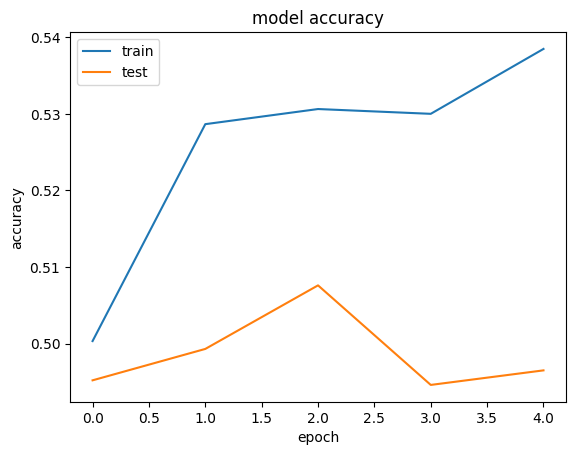

In [35]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

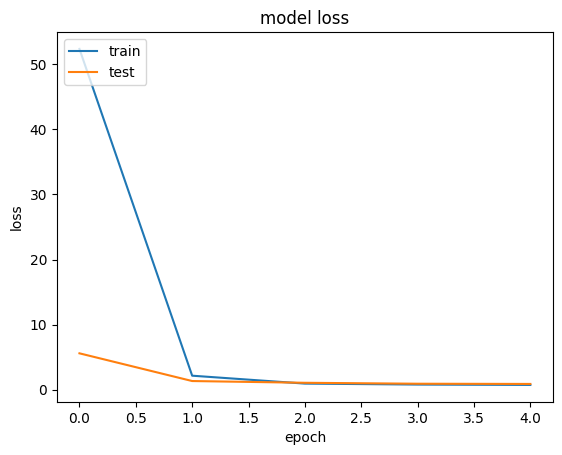

In [37]:
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()